In [21]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
# Laod the csv dataset
file = "./Resources/games.csv"
game_df = pd.read_csv(file)
game_df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Strategy Games, Thematic Games"
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Strategy Games, Thematic Games"
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,Strategy Games
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,Strategy Games
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Strategy Games, Thematic Games"


In [23]:
game_df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000
mean,108210.740748,1984.226230,2.019636,5.673327,91.326772,9.600246,841.778691,6.403363,10170.563976,1.990994,1408.457628
std,98678.347583,214.117399,0.690545,15.239657,545.749554,3.645790,3513.464339,0.935762,5873.389392,0.849022,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11035.250000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5084.750000,1.330000,146.000000
50%,88928.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10168.500000,1.970000,309.000000
75%,192924.750000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.250000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [24]:
# Games pusblished before 1800 removed.
game_df[game_df['Year Published'] < 1800].index
game_df.drop(game_df[game_df['Year Published'] < 1800].index, inplace = True)

In [25]:
# X Features of Max players, play time and complexity only
gameX_df = game_df.drop(['ID','Name', 'Year Published', 'Min Players', 'Min Age', 'Users Rated', 
                         'BGG Rank', 'Owned Users', 'Domains'], axis = 1)
gameX_df.head()

,Max Players,Play Time,Rating Average,Complexity Average
0,4,120,8.79,3.86
1,4,60,8.61,2.84
2,4,120,8.66,3.91
3,5,120,8.43,3.24
4,6,480,8.70,4.22


In [26]:
# Define the feature set
X = gameX_df.copy()
X = X.drop("Complexity Average", axis =1).values


print(X)

[[  4.   120.     8.79]
 [  4.    60.     8.61]
 [  4.   120.     8.66]
 ...
 [  6.    60.     4.3 ]
 [  4.    45.     3.79]
 [  4.    30.     3.18]]


In [27]:
# Define the target set
y = gameX_df["Complexity Average"].values
y[:5]

array([3.86, 2.84, 3.91, 3.24, 4.22])

In [28]:
# Split into training and testing sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, random_state = 78)

In [29]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15053, 3)
(5018, 3)
(15053,)
(5018,)


In [30]:
# Train the model on training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[2.01595139 2.06441714 2.85538309 ... 1.56130446 2.02101848 2.35467412]


In [32]:
# Check prediction of first row
model.predict([[4,120,3.86]])

array([0.92238838])

In [33]:
# Evaluate the model
r2_score(y_test, y_pred)

0.26679370136370817

Text(0.5, 1.0, 'Actual vs Predicted')

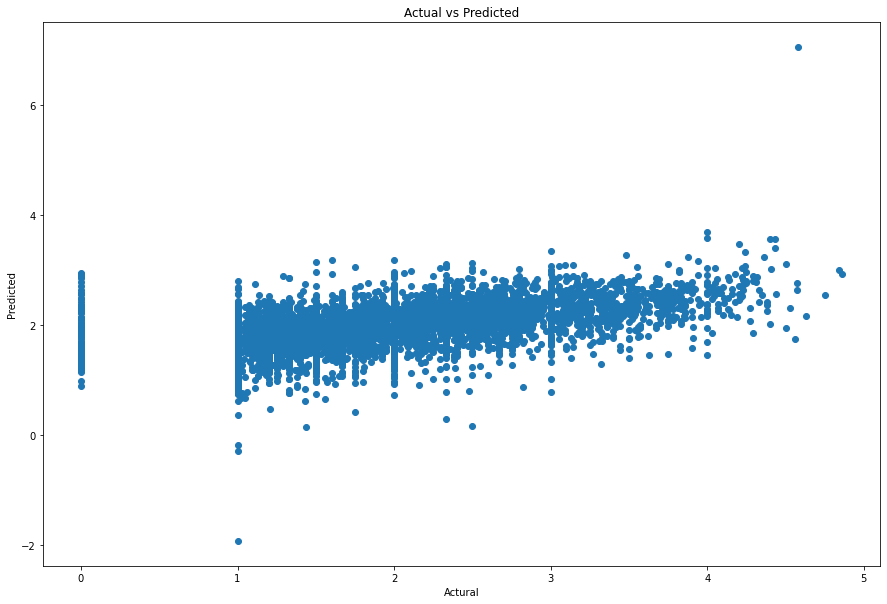

In [34]:
# Plot the results
plt.figure(figsize= (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actural")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

In [35]:
# Predicted values
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df.head(20)

,Actual Value,Predicted Value,Difference
0,1.72,2.015951,-0.295951
1,2.17,2.064417,0.105583
2,3.17,2.855383,0.314617
3,2.33,1.724158,0.605842
4,1.60,2.323949,-0.723949
5,1.50,1.947541,-0.447541
6,2.00,2.442246,-0.442246
7,2.07,1.714024,0.355976
8,1.20,2.464150,-1.264150
9,1.43,1.855729,-0.425729
